In [1]:
import json

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_origin = 'states.json'

with open(data_origin) as json_file:
    data = json.load(json_file)
    states = data['states']
    alphabet = data['alphabet']

In [5]:
s = pd.Series(states).str.lower()
pd.Series(states)

0                    Acre
1                 Alagoas
2                   Amapá
3                Amazonas
4                   Bahia
5                   Ceará
6        Distrito Federal
7          Espírito Santo
8                   Goiás
9                Maranhão
10            Mato Grosso
11     Mato Grosso do Sul
12           Minas Gerais
13                   Pará
14                Paraíba
15                 Paraná
16             Pernambuco
17                  Piauí
18         Rio de Janeiro
19    Rio Grande do Norte
20      Rio Grande do Sul
21               Rondônia
22                Roraima
23         Santa Catarina
24              São Paulo
25                Sergipe
26              Tocantins
dtype: object

In [6]:
s.index

RangeIndex(start=0, stop=27, step=1)

In [7]:
s.head()

0        acre
1     alagoas
2       amapá
3    amazonas
4       bahia
dtype: object

In [8]:
s.to_frame()

,0
0,acre
1,alagoas
2,amapá
3,amazonas
4,bahia
5,ceará
6,distrito federal
7,espírito santo
8,goiás
9,maranhão


In [9]:
df = s.to_frame()

In [10]:
df.head()

,0
0,acre
1,alagoas
2,amapá
3,amazonas
4,bahia


In [11]:
df.index

RangeIndex(start=0, stop=27, step=1)

In [12]:
df.columns = ['estados']
df.head()

,estados
0,acre
1,alagoas
2,amapá
3,amazonas
4,bahia


In [13]:
df2 = df.copy()

In [14]:
df2.index

RangeIndex(start=0, stop=27, step=1)

In [15]:
df2['a'] = s.str.count("a")

In [16]:
df2

,estados,a
0,acre,1
1,alagoas,3
2,amapá,2
3,amazonas,3
4,bahia,2
5,ceará,1
6,distrito federal,1
7,espírito santo,1
8,goiás,0
9,maranhão,2


In [17]:
df2['estados'][2]

'amapá'

Ignora acentuação
.to_frame() para retornar um datafrase, sem essa função é retornada uma serie de valores.

In [18]:
df2 = df2['estados'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').to_frame()

In [19]:
df2['estados'][2]

'amapa'

In [20]:
for l in alphabet:
    df2[l] = s.str.count(l)

In [21]:
pd.set_option('display.max_columns', len(alphabet)+1)

In [22]:
df2

,estados,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,u,v,w,x,y,z
0,acre,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,alagoas,3,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,amapa,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,amazonas,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1
4,bahia,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,ceara,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,distrito federal,1,0,0,2,2,1,0,0,2,0,0,1,0,0,1,0,0,2,1,0,0,0,0,0,0
7,espirito santo,1,0,0,0,1,0,0,0,1,0,0,0,0,1,2,1,0,1,2,0,0,0,0,0,0
8,goias,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9,maranhao,2,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0


In [23]:
df2['letter_count'] = df2.sum(axis=1)

In [24]:
df2.head()

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
0,acre,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,4
1,alagoas,3,0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,7
2,amapa,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,4
3,amazonas,3,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,1,8
4,bahia,2,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,5


In [25]:
df2.sort_values(by='letter_count', ascending=False)

,estados,a,b,c,d,e,f,g,h,i,j,k,l,...,n,o,p,q,r,s,u,v,w,x,y,z,letter_count
19,rio grande do norte,1,0,0,2,2,0,1,0,1,0,0,0,...,2,3,0,0,3,0,0,0,0,0,0,0,15
20,rio grande do sul,1,0,0,2,1,0,1,0,1,0,0,1,...,1,2,0,0,2,1,1,0,0,0,0,0,14
11,mato grosso do sul,1,0,0,1,0,0,1,0,0,0,0,1,...,0,4,0,0,1,3,1,0,0,0,0,0,14
6,distrito federal,1,0,0,2,2,1,0,0,2,0,0,1,...,0,1,0,0,2,1,0,0,0,0,0,0,13
18,rio de janeiro,1,0,0,1,2,0,0,0,2,1,0,0,...,1,2,0,0,2,0,0,0,0,0,0,0,12
12,minas gerais,2,0,0,0,1,0,1,0,2,0,0,0,...,1,0,0,0,1,2,0,0,0,0,0,0,11
23,santa catarina,5,0,1,0,0,0,0,0,1,0,0,0,...,2,0,0,0,1,1,0,0,0,0,0,0,11
16,pernambuco,1,1,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,0,0,0,0,0,10
7,espirito santo,1,0,0,0,1,0,0,0,1,0,0,0,...,1,2,1,0,1,2,0,0,0,0,0,0,10
10,mato grosso,1,0,0,0,0,0,1,0,0,0,0,0,...,0,3,0,0,1,2,0,0,0,0,0,0,9


In [27]:
df_plot = df2.copy()

In [30]:
df_plot = df_plot.drop(columns=['letter_count'])

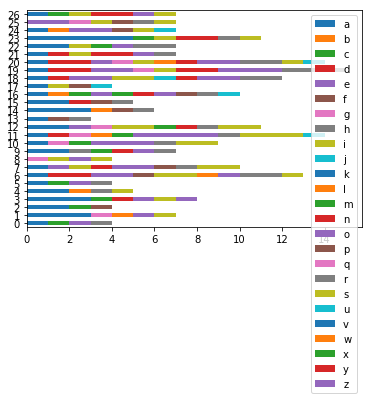

In [33]:
df_plot.plot(kind='barh', stacked=True);